# Analysis of a sentiment classification model

This notebook presents an analysis of a sentiment classification model using the IMDB database. The objective is to build a neural network model that can predict whether a movie review is positive or negative.

We start by importing the necessary libraries, including numpy, keras, and matplotlib. Next, the IMDB dataset is loaded and split into training and test sets.

In [ ]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers
import matplotlib.pyplot as plt


In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


Each word is represented by a number



In [ ]:
word_index = imdb.get_word_index()
word_index

1641221/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,


We are going to modify the ordering of the dictionary, prioritizing the numerical values followed by the corresponding words.

In [ ]:
word_index = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
word_index

In [ ]:
for _ in train_data[0]:
  print(word_index.get(_-3))

Since words are represented by numbers, a modification is made to the dictionary to prioritize the numerical values followed by the corresponding words. Then, the sequences of words are vectorized so that they can be processed by the neural network.

In [ ]:
def vectorize(sequences, dim = 10000):
  results = np.zeros((len(sequences), dim))

  for i, sequences in enumerate(sequences):
    results[i, sequences] = 1
  return results

In [ ]:
x_train = vectorize(train_data)
x_test = vectorize(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### Create the model
The neural network model is created using the sequential API of Keras, with dense layers and ReLU and sigmoid activation functions. The model is compiled with the 'rmsprop' optimizer and 'binary_crossentropy' loss function.




In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = 'accuracy')

Next, the training data is split into a training set and a validation set, and the model is trained for 20 epochs.

In [ ]:
x_validation = x_train[:10000]
partial_x_train = x_train[10000:]

y_validation = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_validation,y_validation))

Epoch 1/20
30/30 [==============================] - 3s 71ms/step - loss: 0.5291 - accuracy: 0.7907 - val_loss: 0.4258 - val_accuracy: 0.8426
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3393 - accuracy: 0.8909 - val_loss: 0.3261 - val_accuracy: 0.8768
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2524 - accuracy: 0.9135 - val_loss: 0.2933 - val_accuracy: 0.8844
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2042 - accuracy: 0.9308 - val_loss: 0.2830 - val_accuracy: 0.8867
Epoch 5/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1714 - accuracy: 0.9437 - val_loss: 0.2846 - val_accuracy: 0.8859
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1467 - accuracy: 0.9498 - val_loss: 0.2951 - val_accuracy: 0.8827
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1244 - accuracy: 0.9616 - val_loss: 0.3467 - val_accuracy: 0.8709
Epoch 8/20
30


To visualize the results, we follow the steps below:

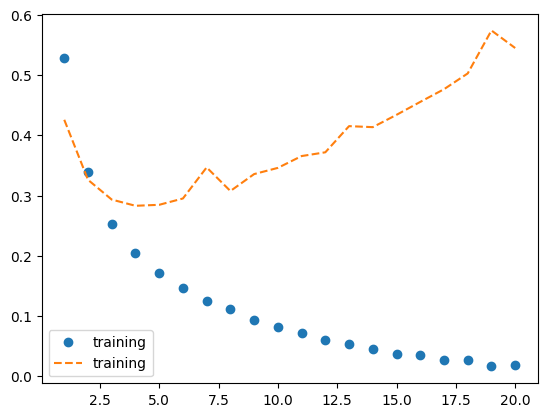

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoch = range(1, len(loss_values)+1)
plt.plot(epoch, loss_values,"o", label='training')
plt.plot(epoch, val_loss_values,"--", label='training')
plt.legend()
plt.show()

In the training phase, the model exhibits rapid iteration in the loss function. However, in the validation set, the performance is not as efficient and seems to stagnate. This indicates that our neural network may be experiencing overfitting, where it becomes overly specialized to the training data and fails to generalize well to new, unseen data.

In [ ]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.5910 - accuracy: 0.8582


[0.5910207629203796, 0.8581600189208984]

Upon evaluating our results, we can observe that they are reasonably good, but there is room for improvement by addressing the issue of overfitting.

# Improving the model

### Creating a simpler model
In order to reduce overfitting we create a less complex model as shown below:

In [ ]:
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = 'accuracy')

history2 = model2.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_validation,y_validation))



Epoch 1/20
30/30 [==============================] - 2s 57ms/step - loss: 0.5676 - accuracy: 0.7583 - val_loss: 0.4663 - val_accuracy: 0.8461
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3890 - accuracy: 0.8817 - val_loss: 0.3697 - val_accuracy: 0.8673
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2998 - accuracy: 0.9085 - val_loss: 0.3167 - val_accuracy: 0.8841
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2456 - accuracy: 0.9221 - val_loss: 0.2992 - val_accuracy: 0.8840
Epoch 5/20
30/30 [==============================] - 2s 58ms/step - loss: 0.2089 - accuracy: 0.9337 - val_loss: 0.2800 - val_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 1s 49ms/step - loss: 0.1802 - accuracy: 0.9443 - val_loss: 0.2874 - val_accuracy: 0.8841
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1591 - accuracy: 0.9505 - val_loss: 0.2776 - val_accuracy: 0.8886
Epoch 8/20
30

### We compare the two models, considering the simplest model against the most complex model.

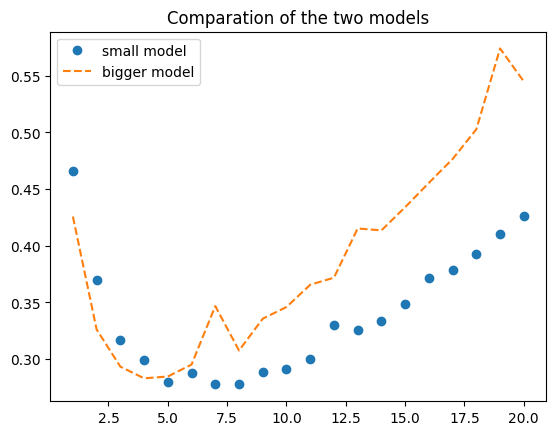

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values_2 = history2.history['val_loss']

epoch = range(1, len(loss_values)+1)
plt.title('Comparation of the two models')
plt.plot(epoch, val_loss_values_2,"o", label='small model')
plt.plot(epoch, val_loss_values,"--", label='bigger model')
plt.legend()
plt.show()

The smaller model exhibits a delayed onset of overfitting compared to the more complex model, where overfitting becomes prominent at a faster rate.

### Regularization

In [ ]:
from keras import regularizers

In [ ]:
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,), kernel_regularizer= regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation='relu', kernel_regularizer= regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = 'accuracy')

history3 = model3.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_validation,y_validation))


Epoch 1/20
30/30 [==============================] - 3s 84ms/step - loss: 0.6330 - accuracy: 0.7419 - val_loss: 0.5206 - val_accuracy: 0.8444
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.4350 - accuracy: 0.8770 - val_loss: 0.4038 - val_accuracy: 0.8751
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3399 - accuracy: 0.9055 - val_loss: 0.3865 - val_accuracy: 0.8600
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2894 - accuracy: 0.9189 - val_loss: 0.3360 - val_accuracy: 0.8888
Epoch 5/20
30/30 [==============================] - 2s 54ms/step - loss: 0.2586 - accuracy: 0.9308 - val_loss: 0.3463 - val_accuracy: 0.8782
Epoch 6/20
30/30 [==============================] - 2s 66ms/step - loss: 0.2367 - accuracy: 0.9410 - val_loss: 0.3617 - val_accuracy: 0.8755
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.2203 - accuracy: 0.9463 - val_loss: 0.3323 - val_accuracy: 0.8858
Epoch 8/20
30

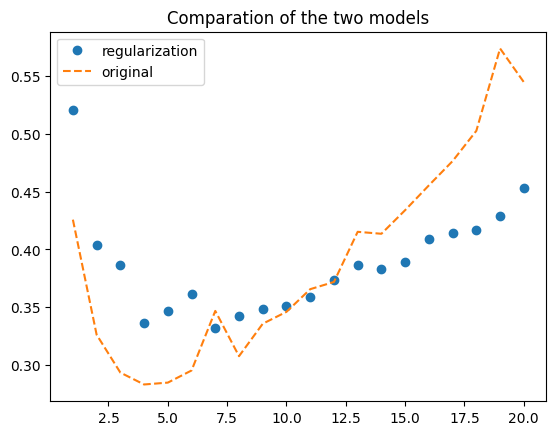

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values_3 = history3.history['val_loss']

epoch = range(1, len(loss_values)+1)
plt.title('Comparation of the two models')
plt.plot(epoch, val_loss_values_3,"o", label='regularization')
plt.plot(epoch, val_loss_values,"--", label='original')
plt.legend()
plt.show()

We can observe that by using regularization overfitting does not scale so quickly.

### Dropout

Finally, the Dropout technique is introduced to reduce overfitting. A new model is created that includes Dropout layers, and its performance is compared to the original model.



In [ ]:
model4 = models.Sequential()
model4.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model4.add(layers.Dropout(0.50)) #Dropout
model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dropout(0.50)) #Dropout
model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = 'accuracy')

history4 = model4.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_validation,y_validation))


Epoch 1/20
30/30 [==============================] - 4s 94ms/step - loss: 0.6271 - accuracy: 0.6396 - val_loss: 0.5026 - val_accuracy: 0.8522
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.4987 - accuracy: 0.7751 - val_loss: 0.4009 - val_accuracy: 0.8691
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.4218 - accuracy: 0.8269 - val_loss: 0.3261 - val_accuracy: 0.8834
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3525 - accuracy: 0.8677 - val_loss: 0.2954 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.3072 - accuracy: 0.8899 - val_loss: 0.3087 - val_accuracy: 0.8774
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2744 - accuracy: 0.9054 - val_loss: 0.2710 - val_accuracy: 0.8921
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2404 - accuracy: 0.9213 - val_loss: 0.2788 - val_accuracy: 0.8899
Epoch 8/20
30

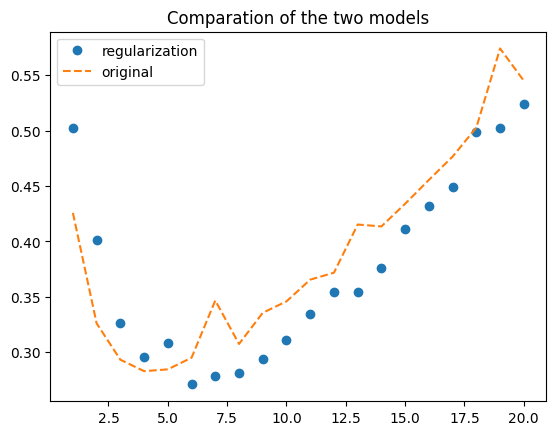

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
val_loss_values_4 = history4.history['val_loss']

epoch = range(1, len(loss_values)+1)
plt.title('Comparation of the two models')
plt.plot(epoch, val_loss_values_4,"o", label='regularization')
plt.plot(epoch, val_loss_values,"--", label='original')
plt.legend()
plt.show()

In summary, this notebook provides an introduction to text data processing using neural networks for sentiment classification. The issue of overfitting is explored, and regularization techniques are presented to mitigate it.